In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import import_ipynb
import phase_screen_model_classes as ps

In [65]:
class PlotResults:
    
    def __init__(self, phase_screen_dec, e_theoretical):  #, phase_screen_cyl
        self.phase_screen_dec = phase_screen_dec
        self.e_theoretical = e_theoretical
        self.phase_screen_cyl = phase_screen_cyl
        
    
   
    def plot_results(self, wavelength, z_divide_lambda):
        numerical_results = self.phase_screen_dec.generation_of_phase_screen_dec()
        I_theory = self.e_theoretical.calculate_E_theoretical()
        cyl_results = self.phase_screen_cyl.generation_of_phase_screen_cyl()
        
        plt.rcParams.update({'font.size': 12})
        fig, axs = plt.subplots(
            len(z_divide_lambda), 2, figsize=(16, 28) )
        
        fig.subplots_adjust(hspace = 0.6)  
        for i, (zi, num_intensity, th_intensity) in enumerate(  
            zip(z_divide_lambda, numerical_results, I_theory)
        ):
            axs[i][0].plot(
                self.phase_screen_dec.x /wavelength,
                th_intensity,
                label="Theoretical",
                linewidth=4,
            )
            axs[i][0].plot(
                self.e_theoretical.x /wavelength,
                num_intensity,
                label="Cartesian",
                linewidth=4,
                linestyle="--",
            )
      
            axs[i][0].set_title(f"dz / λ = {zi}")
            axs[i][0].set_xlabel("x / λ")
            axs[i][0].set_ylabel("Интенсивность |E|^2")
            axs[i][0].legend()
            axs[i][0].grid()
            axs[i][0].set_ylim([0, 8])
        
        for i, (zi,  th_intensity, cyl_intensity) in enumerate(
            zip(z_divide_lambda, I_theory, cyl_results)
        ):
            axs[i][1].plot(
                self.e_theoretical.x /wavelength,
                th_intensity,
                label="Theoretical",
                linewidth=4,
            )
           
            axs[i][1].plot(
                self.phase_screen_cyl.theta * self.phase_screen_cyl.R /wavelength,
                cyl_intensity,
                label="Cylindrical",
                linewidth=4,
                linestyle="dotted",
            )
            axs[i][1].set_title(f"dr / λ = {zi}")
            axs[i][1].set_xlabel(" θ * R / λ")
            axs[i][1].set_ylabel("Интенсивность |E|^2")
            axs[i][1].legend()
            axs[i][1].grid()
            axs[i][1].set_ylim([0, 8])
        
        
        # plt.tight_layout()    
        plt.savefig(f"C:\\GitHub\\master_diploma\\figures\\grid_size={self.phase_screen_dec.grid_size}_cyl_dec1.2.png", dpi='figure')
        plt.show()


In [49]:
class PlotResultsCyl:
    
    def __init__(self, e_theoretical, phase_screen_cyl): 
        
        self.e_theoretical = e_theoretical
        self.phase_screen_cyl = phase_screen_cyl
        
    
   
    def plot_results(self, wavelength, z_divide_lambda):
        
        I_theory = self.e_theoretical.calculate_E_theoretical()
        cyl_results = self.phase_screen_cyl.generation_of_phase_screen_cyl()
        
        plt.rcParams.update({'font.size': 12})
        fig, axs = plt.subplots(
            len(z_divide_lambda), 1, figsize=(8, 28) )

        fig.subplots_adjust(hspace = 0.6) 
        for i, (zi,  th_intensity, cyl_intensity) in enumerate(
            zip(z_divide_lambda, I_theory, cyl_results)
        ):
            axs[i].plot(
                self.e_theoretical.x /wavelength,
                th_intensity,
                label="Theoretical",
                linewidth=4,
            )
           
            axs[i].plot(
                self.phase_screen_cyl.theta * self.phase_screen_cyl.R /wavelength,
                cyl_intensity,
                label="Cylindrical",
                linewidth=4,
                linestyle="dotted",
            )
            axs[i].set_title(f"dr / λ = {zi}")
            axs[i].set_xlabel(" θ * R / λ")
            axs[i].set_ylabel("Интенсивность |E|^2")
            axs[i].legend()
            axs[i].grid()
            axs[i].set_ylim([0, 8])
        
        # plt.tight_layout()    
        plt.savefig(f"C:\\GitHub\\master_diploma\\figures\\grid_size={self.phase_screen_cyl.grid_size}_10prLTopangaCyl.png", dpi='figure')
        plt.show()


In [70]:
# Constants

#both cartesian and cylindrical
c = 3e8
freq = 1e9
wavelength = c/freq #meters,  GHz frequency
k = 2 * np.pi / wavelength
phi0 = 10  # phi0 in radians
r0 = wavelength
L = 20*wavelength*1.2 # L = 60  # L/2 = 10*lambda, L =20*Lambda = 20*3 = 60,  Length of the observation grid
#Here dz_values = z2-z1, where z1 = 0, z2 = z1 + dz = 0 + dz_values 
z_divide_lambda =  np.concatenate((np.array([0.1, 0.3, 0.5, 0.8]) , np.linspace(2, 10, 3)))
dz_values = z_divide_lambda*wavelength


#cylindrical only
R = 100  # meters to source (it is radius of circle)
Grid_theta = 0.06*1.2  # radians
r = 100
dr_values = z_divide_lambda*wavelength
#only odd, so (2n+1) 
grid_sizes = np.linspace(2048, 4001, 2 ,dtype='int')

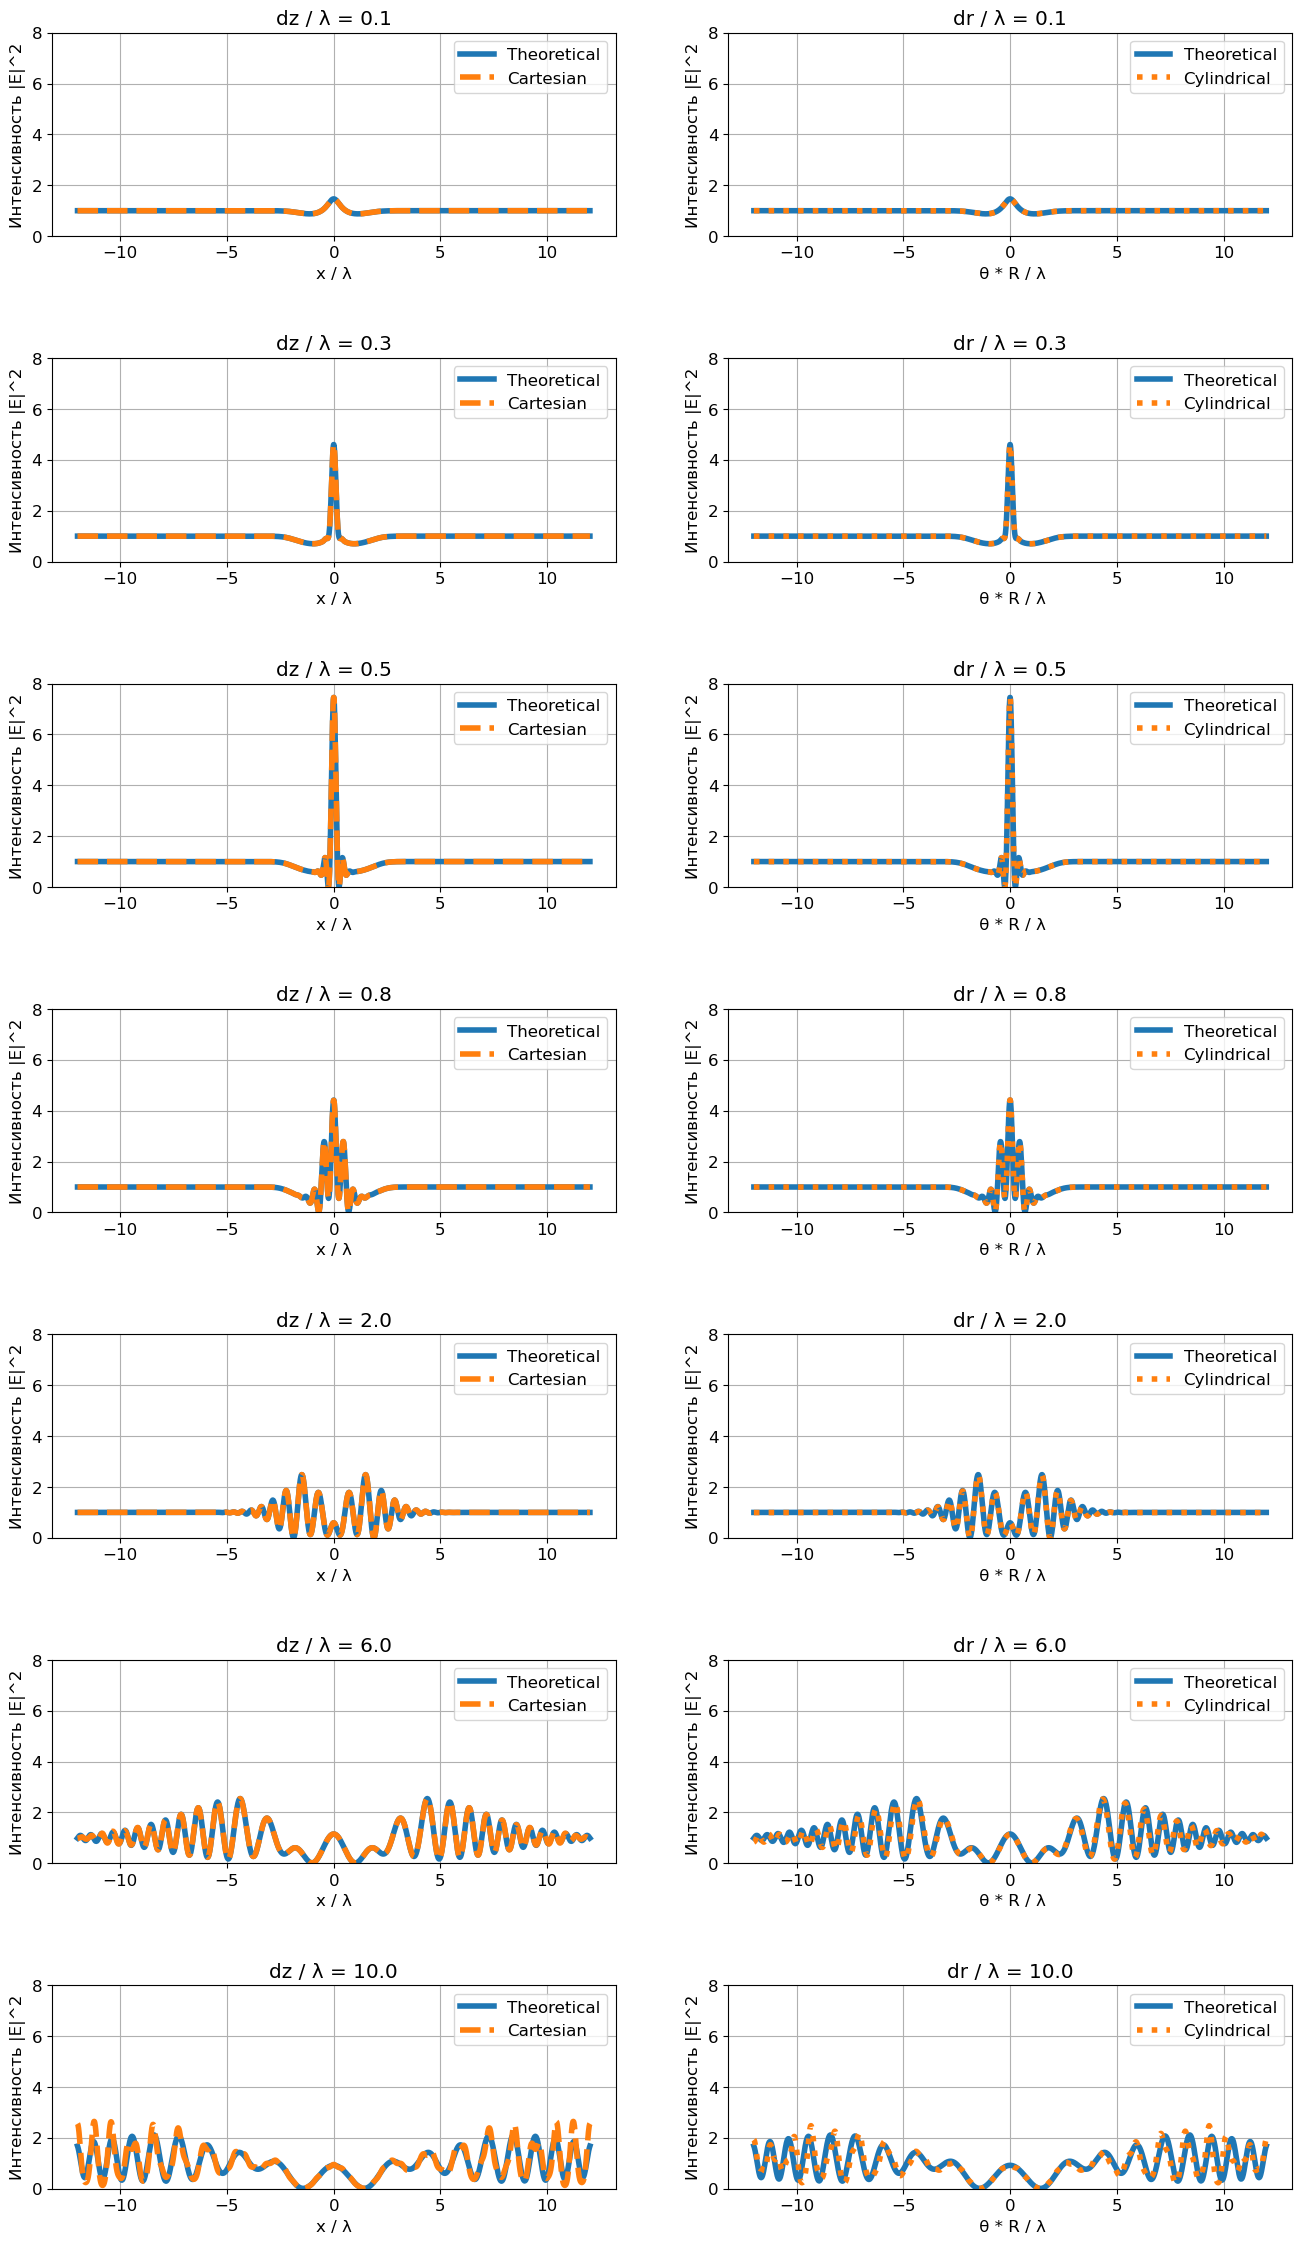

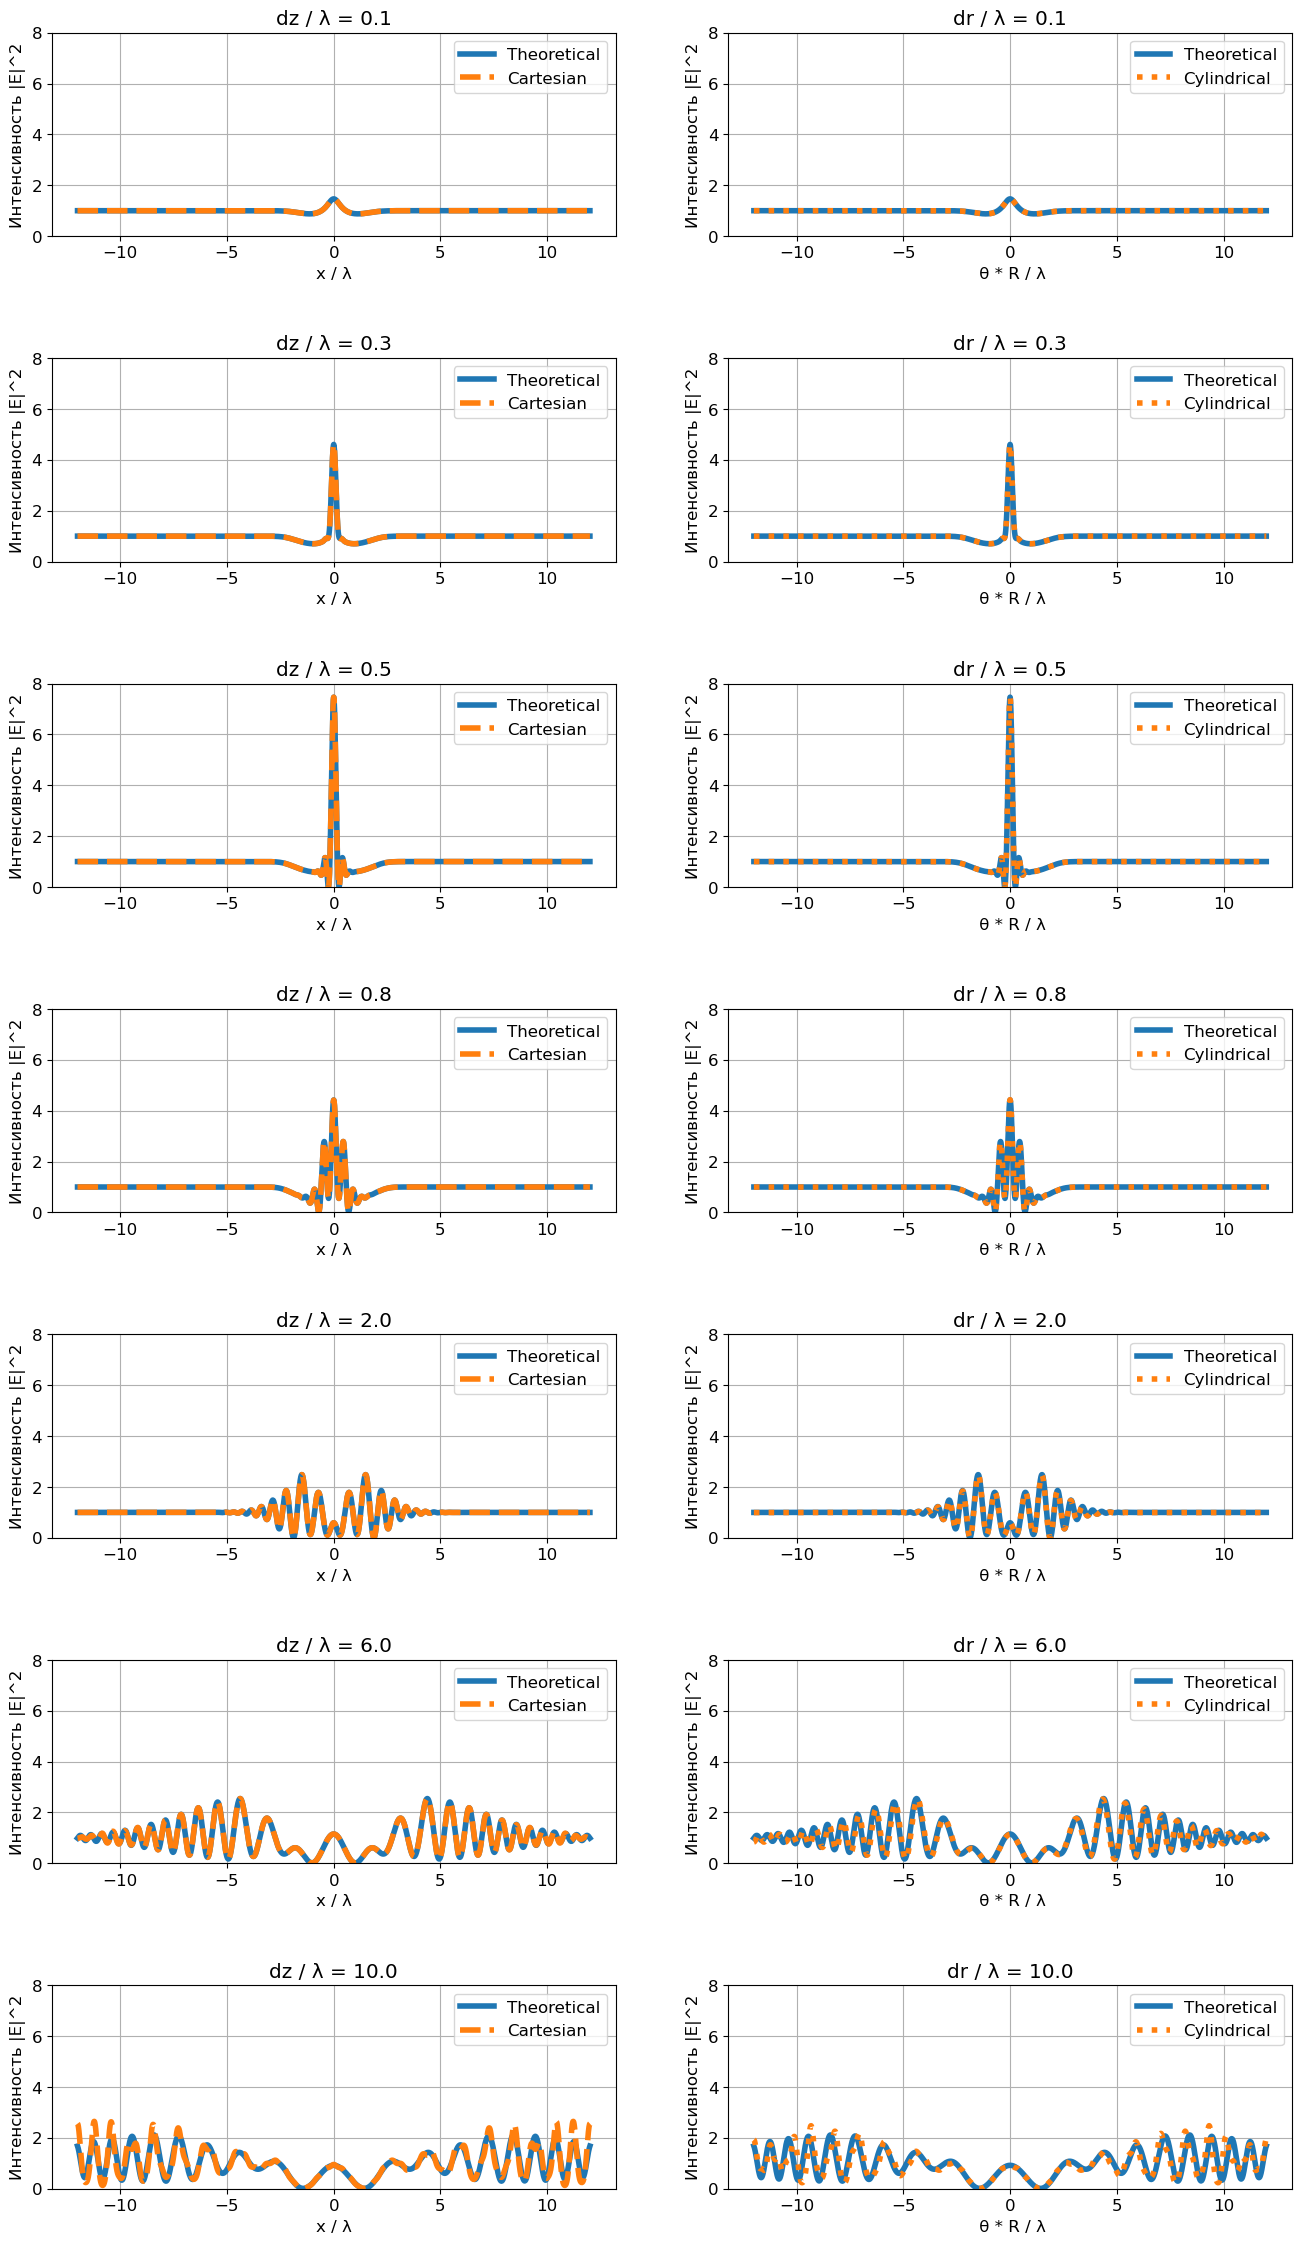

In [71]:
# Create phase screens and plots
for grid_size in grid_sizes:
    phase_screen_dec = ps.PhaseScreenDec(k, phi0, r0, grid_size, L, dz_values)
    e_theoretical = ps.E_theoretical(k, phi0, r0, grid_size, L, dz_values)
    phase_screen_cyl = ps.PhaseScreenCyl(k, phi0, r0, grid_size, R, Grid_theta, r, dr_values)
    results_plot = PlotResults(phase_screen_dec, e_theoretical)
    results_plot.plot_results(wavelength, z_divide_lambda)
    # results_plotCyl = PlotResultsCyl(e_theoretical, phase_screen_cyl)
    # results_plotCyl.plot_results(wavelength,z_divide_lambda)
    # checking_dec = ps.CheckingCriterions(phase_screen_dec.phi, phase_screen_dec.dx)
    
    


In [68]:
class PlotErrorsDec:
    
    def __init__(self, phase_screen_dec, e_theoretical):  
        self.phase_screen_dec = phase_screen_dec
        self.e_theoretical = e_theoretical
      
        
    
   
    def plot_results(self, wavelength, z_divide_lambda, grid_sizes):
    
        numerical_results = {z: [] for z in z_divide_lambda}
        
        dx_values_div_lambda = self.phase_screen_dec.L/grid_sizes/wavelength
        
        for z_lambda in z_divide_lambda:
            for grid_size in grid_sizes:
                
                

                # Create updated Cartesian phase screen and theoretical results for the current z_divide_lambda
                updated_phase_screen_dec = ps.PhaseScreenDec(self.phase_screen_dec.k,
                                                        self.phase_screen_dec.phi0,
                                                        self.phase_screen_dec.r0,
                                                        grid_size,
                                                        self.phase_screen_dec.L,
                                                        [z_lambda*wavelength]) # Single z_divide_lambda
                
                updated_theoretical = ps.E_theoretical(self.phase_screen_dec.k,
                                                        self.phase_screen_dec.phi0,
                                                        self.phase_screen_dec.r0,
                                                        grid_size,
                                                        self.phase_screen_dec.L,
                                                        [z_lambda*wavelength])


                
                numerical_results[z_lambda].append(np.max(np.abs(np.array(updated_phase_screen_dec.generation_of_phase_screen_dec()) - np.array(updated_theoretical.calculate_E_theoretical()))))
        
        
    
        plt.rcParams.update({'font.size': 12})
        
        
        
        plt.figure(figsize=(10, 12), dpi=80)
        plt.title("Cartesian coordinates")
        for zi, num_intensity in numerical_results.items():  
            plt.plot(
                dx_values_div_lambda,  
                num_intensity,  
                label=f'dz / λ = {zi}',
                marker='o'
            )
       
        
        plt.xlabel("dx / λ")
        plt.ylabel("Максимальная абсолютная погрешность")
        plt.legend()
        plt.grid()
        
        
       
        plt.savefig(f"C:\\GitHub\\master_diploma\\figures\\L10prForReview.png", dpi='figure')
        plt.show()


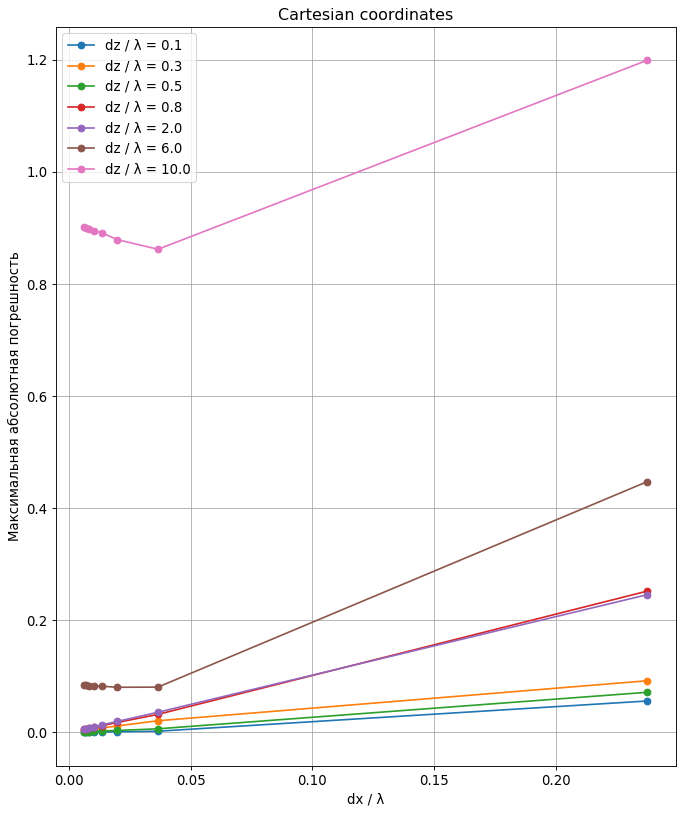

In [69]:
# Create phase screens and error plots

results_plot = PlotErrorsDec(phase_screen_dec, e_theoretical)   
results_plot.plot_results(wavelength, z_divide_lambda, grid_sizes)

In [44]:
class PlotErrorsCyl:
    
    def __init__(self, phase_screen_cyl, e_theoretical):   
        self.e_theoretical = e_theoretical
        self.phase_screen_cyl = phase_screen_cyl
        
    
   
    def plot_results(self, wavelength, z_divide_lambda, grid_sizes):
    
        cyl_results = {z: [] for z in z_divide_lambda}
        dtheta_values_div_lambda =  self.phase_screen_cyl.Grid_theta*self.phase_screen_cyl.R/grid_sizes/wavelength
        
        for z_lambda in z_divide_lambda:
            for grid_size in grid_sizes:
                

                updated_theoretical = ps.E_theoretical(self.e_theoretical.k,
                                                        self.e_theoretical.phi0,
                                                        self.e_theoretical.r0,
                                                        grid_size,
                                                        self.e_theoretical.L,
                                                        [z_lambda*wavelength])

                # Create updated Cylindrical phase screen for the current z_divide_lambda
                updated_phase_screen_cyl = ps.PhaseScreenCyl(self.phase_screen_cyl.k,
                                                        self.phase_screen_cyl.phi0,
                                                        self.phase_screen_cyl.r0,
                                                        grid_size,
                                                        self.phase_screen_cyl.R,
                                                        self.phase_screen_cyl.Grid_theta,
                                                        self.phase_screen_cyl.r,
                                                        [z_lambda*wavelength])
                
            
                cyl_results[z_lambda].append(np.max(np.abs(np.array(updated_phase_screen_cyl.generation_of_phase_screen_cyl()) 
                                                           - np.array(updated_theoretical.calculate_E_theoretical()))))
                
     

    
        plt.rcParams.update({'font.size': 12})
        
        
        fig, axs = plt.subplots(len(z_divide_lambda), 1, figsize=(10, 25), constrained_layout=True)
        

        for i,(zi, cyl_intensity) in enumerate(cyl_results.items()):
            axs[i].plot(
                dtheta_values_div_lambda,  
                cyl_intensity,  
                label=f'dr / λ = {zi}',
                marker='x'
            )
            axs[i].set_title("Cylindrical coordinates")
            axs[i].set_xlabel(r"dθ * R / λ")
            axs[i].set_ylabel("Макс. абсолют. погрешность")
            axs[i].legend()
            axs[i].grid()
        plt.savefig(f"C:\\GitHub\\master_diploma\\figures\\L10pr.0TOTALcylGraphsForReview.png", dpi='figure')
        plt.show()

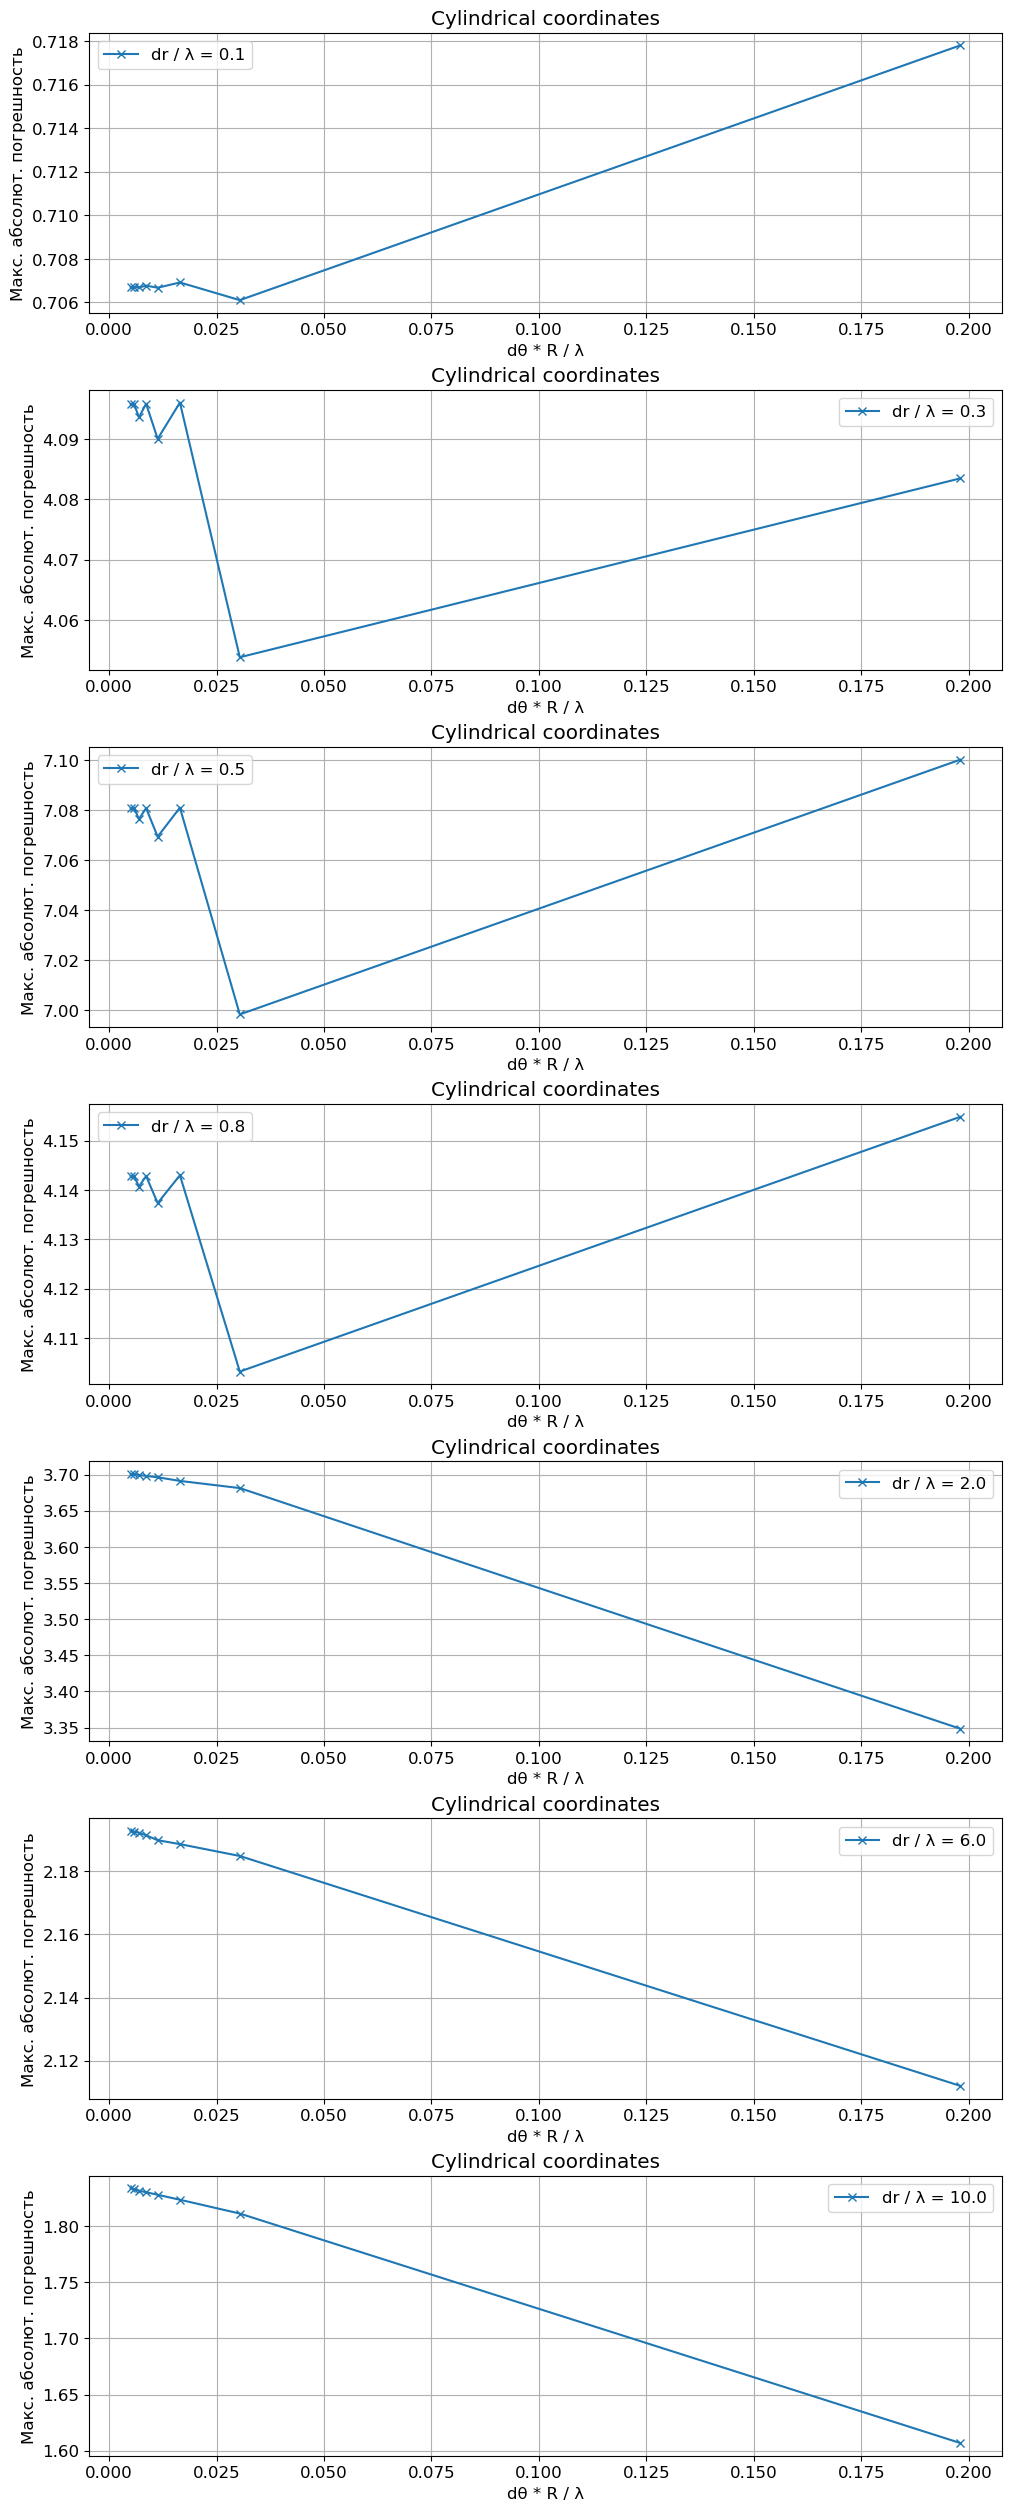

In [45]:

# Create phase screens and error plots
results_plot = PlotErrorsCyl(phase_screen_cyl, e_theoretical)   
results_plot.plot_results(wavelength, z_divide_lambda, grid_sizes)